# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize band)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define percent bands

In [4]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [5]:
strategies = pd.Series()
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    _, strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].get_stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'ending_balance',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'trades_per_year',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,6.61,6.50,6.60,6.29,6.31,6.64,6.61,6.65,6.60,6.68,6.60,6.15,5.78,5.64,5.14,5.40,5.16,5.30,5.31,5.08
ending_balance,3415486.62,3122538.53,3382941.04,2596637.66,2648839.41,3516560.34,3414828.99,3530974.16,3387258.74,3633088.03,3392170.26,2306171.93,1672937.96,1495133.06,967240.67,1208364.19,981100.21,1107531.25,1117304.21,916122.85
max_closed_out_drawdown,-51.57,-49.47,-49.46,-55.14,-54.31,-55.76,-57.79,-56.58,-53.61,-54.99,-49.72,-50.56,-50.56,-53.51,-54.49,-47.54,-47.54,-47.54,-50.32,-52.65
drawdown_annualized_return,-7.81,-7.61,-7.50,-8.77,-8.61,-8.40,-8.75,-8.51,-8.13,-8.23,-7.53,-8.22,-8.75,-9.48,-10.60,-8.81,-9.22,-8.97,-9.48,-10.37
drawdown_recovery,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.42,-3.42,-3.59,-3.59,-3.59,-3.59,-3.59,-3.59,-3.59
best_month,27.01,27.01,27.01,27.02,27.02,27.01,27.00,27.01,27.01,27.02,27.01,27.02,27.02,22.42,22.41,22.41,22.41,22.41,22.42,22.42
worst_month,-26.88,-26.88,-26.89,-30.46,-27.07,-27.06,-27.06,-29.72,-29.72,-29.72,-29.72,-31.45,-31.46,-31.45,-31.47,-31.46,-31.47,-31.45,-31.46,-31.45
sharpe_ratio,0.59,0.58,0.59,0.56,0.57,0.59,0.59,0.59,0.58,0.59,0.58,0.53,0.51,0.50,0.46,0.48,0.46,0.46,0.47,0.45
sortino_ratio,0.60,0.59,0.60,0.58,0.58,0.60,0.60,0.60,0.59,0.60,0.60,0.54,0.51,0.50,0.46,0.48,0.46,0.47,0.47,0.46
monthly_std,3.31,3.34,3.34,3.38,3.36,3.35,3.35,3.40,3.38,3.40,3.41,3.53,3.54,3.52,3.56,3.50,3.55,3.57,3.59,3.64


Bar graphs

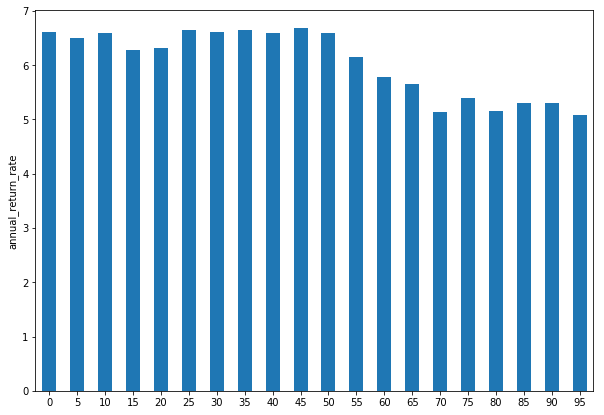

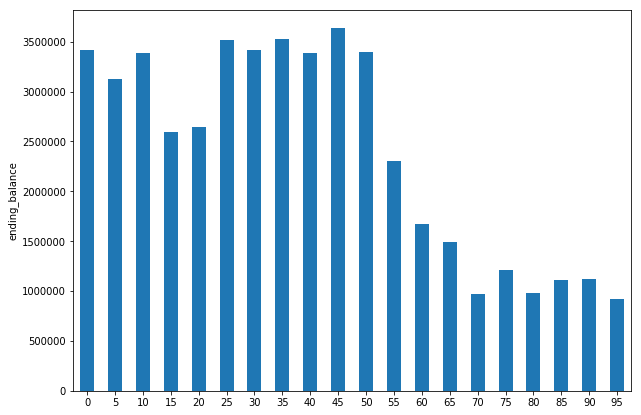

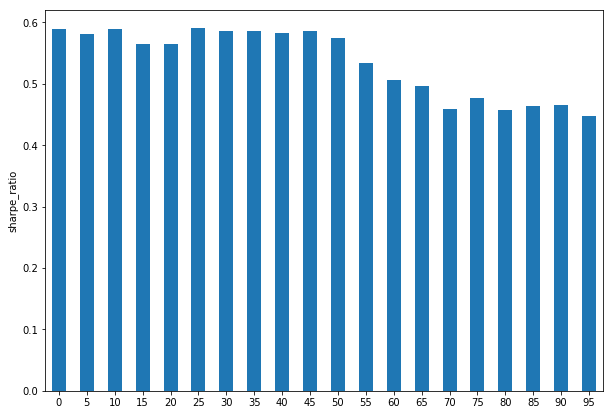

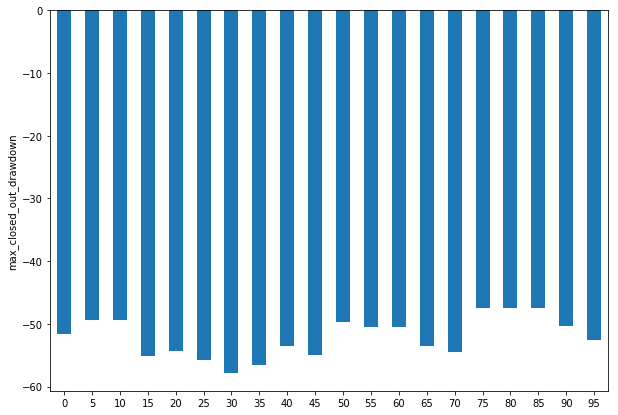

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1928-10-16 00:00:00 BUY  460 ^GSPC @ 21.72
2019-12-23 00:00:00 SELL 460 ^GSPC @ 3224.01


Equity curve

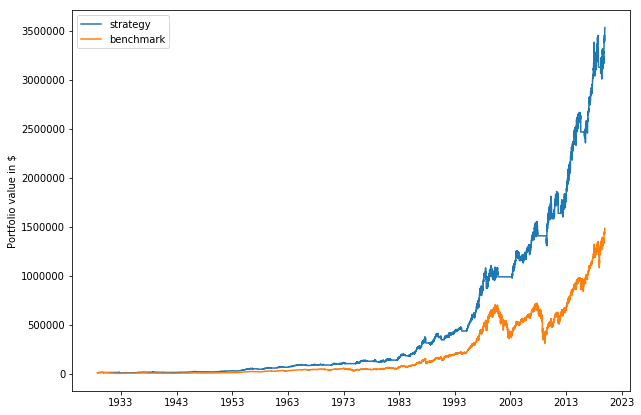

In [9]:
pf.plot_equity_curve(strategies['35'].dbal, benchmark=benchmark.dbal)